In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sym
import math
import sys

In [98]:
data = pd.read_csv('hw2.txt',delim_whitespace = 1, header=None)
data.columns = ['X', 'Y', 'Class']
Class1, Class2 = data[data['Class']==0], data[data['Class']==1]

print(Class1)
print(Class2)

    

     X    Y  Class
0  0.8  1.2      0
1  0.9  1.4      0
2  1.2  1.4      0
3  1.1  1.5      0
      X    Y  Class
4  0.80  1.1      1
5  0.60  1.0      1
6  0.65  1.1      1
7  0.75  0.9      1


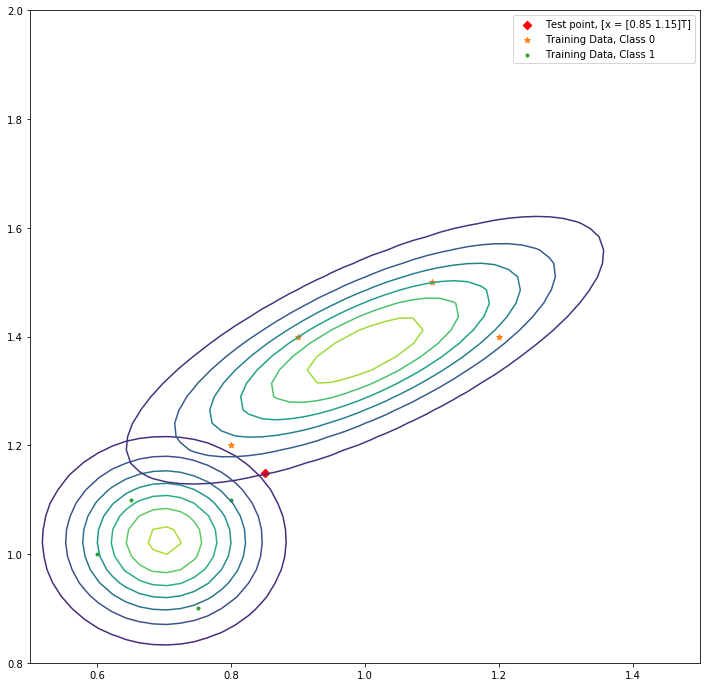

In [188]:
#1B
x1 = np.array([[0.85, 1.15]])
def C1(x, y):
    mu = np.array([1.0, 1.375])
    Cov_1 = np.array([[0.0333, 0.0167], [0.0167, 0.0158]])
    A1 = 1
    d = 2
    Cov_Inv = np.linalg.inv(Cov_1)
    xar = np.array([x,y])
    
    p1a = (2*math.pi)**(d/2)
    p1b = A1/((np.linalg.det(Cov_1))**(1/2)*p1a )
    p1c = np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar - mu)),Cov_Inv),(xar-mu))))
    p1 = p1b * p1c
    return p1
    
def C2(x, y): 
    mu = np.array([0.7, 1.025])
    Cov_2 = np.array([[0.0083, 0], [0, 0.0092]])
    A1 = 1
    d = 2
    Cov_Inv = np.linalg.inv(Cov_2)
    xar = np.array([x,y])
    
    p1a = (2*math.pi)**(d/2)
    p1b = A1/((np.linalg.det(Cov_2))**(1/2)*p1a )
    p1c = np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar - mu)),Cov_Inv),(xar-mu))))
    p1 = p1b * p1c
    return p1



fig = plt.figure(figsize=(12,12))
x = np.linspace(.5, 1.5, 50)
y = np.linspace(0.8, 2, 50)
A, B = np.meshgrid(x,y)
C = np.vectorize(C2)
D = np.vectorize(C1)
plt.scatter(0.85, 1.15, marker='D', Color = 'Red', label="Test point, [x = [0.85 1.15]T]")
plt.scatter(Class1['X'], Class1['Y'], label="Training Data, Class 0", marker = '*')
plt.scatter(Class2['X'], Class2['Y'], label="Training Data, Class 1", marker = '.')
plt.legend()
plt.contour(A,B, C(A,B))
plt.contour(A,B, D(A,B))

#plt.savefig(num1B.jpeg)

In [119]:
#1eii
from scipy.spatial import distance

x1 = np.transpose(np.array([[0.85, 1.15]]))

Mu1 = np.array([1.0, 1.375])
Mu2 = np.array([0.7, 1.025])

#Euclidean 1
dist1 = math.sqrt((x1[0]-Mu1[0])**2 + (x1[1]-Mu1[1])**2)
dist2 = math.sqrt((x1[0]-Mu2[0])**2 + (x1[1]-Mu2[1])**2)

'''
From SCIPY
dist1 = distance.euclidean(x1, Mu1)
dist2 = distance.euclidean(x1, Mu2)
'''
print(dist1)
print(dist2)


0.2704163456597993
0.19525624189766638


In [181]:
#1eiii
x1 = np.transpose(np.array([[0.85, 1.15]]))
Cov1 = np.array([[0.0333, 0.0167], [0.0167, 0.0158]])
Cov1_inv = np.linalg.inv(Cov1)
Cov2 = np.array([[0.0083, 0], [0, 0.0092]])
Cov2_inv = np.linalg.inv(Cov2)

#dist3 = np.dot(np.dot(Cov1_inv,Mu1),x1) + (np.dot(np.dot(Cov1_inv,Mu1), Mu1)) *-1/2

#SCIPY
dist1 = distance.mahalanobis(x1, Mu1 , Cov1_inv)
dist2 = distance.mahalanobis(x1, Mu2 , Cov2_inv)
print(dist1)
print(dist2)
print('X belongs to Class 1')

1.9227366114071112
2.0998125960931295
X belongs to Class 1
